#### 1 - Identifique e elimine preditoras correlacionadas. Mostre os coeficientes antes e depois da eliminação. Antes da eliminação não precisa utilizar todas as variáveis da base de dados.

In [230]:
def more_correlated(data, min, max):
    corr = data.corr()
    matrix = pd.DataFrame()
    dic = {}

    for column in corr:    
        for line in corr.columns:
            value = corr[column][line]

            if((value < min and value > -1) or (value > max and value < 1)):    
                dic[line] = value
        
        
        if(len(dic) > 0):
            df = pd.DataFrame({column:dic})
            matrix = pd.concat([matrix, df])
            dic.clear()
        
    return matrix

In [231]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("train.csv")
data = data.drop(["Id"], axis=1)

In [232]:
matrix = more_correlated(data, -0.7, 0.7)

<AxesSubplot:>

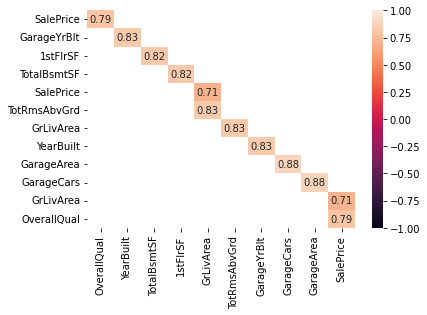

In [233]:
sns.heatmap(matrix, vmin=-1, vmax=1, annot=True)

In [234]:
data = data.drop(["GarageCars", "GarageYrBlt", "1stFlrSF", "TotRmsAbvGrd"], axis=1)

In [235]:
matrix_after = more_correlated(data, -0.7, 0.7)

<AxesSubplot:>

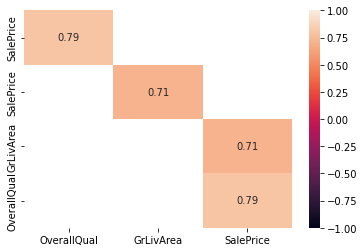

In [236]:
sns.heatmap(matrix_after, vmin=-1, vmax=1, annot=True)

#### 2 - Encontre uma variável de confundimento e demonstre através dos coeficientes os efeitos de utilizar ou não esta variável na regressão.

In [237]:
sp = data["SalePrice"]
sp

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [238]:
train = data.drop(["SalePrice"], axis=1)
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [239]:
#preenchedo valores ausentes e retirando valores categoricos
medians = {}

for i in train:
    if(train[i].dtype == "object"):
        train = train.drop([i], axis=1)
    else:
        if(train[i].isnull().any()):
            medians[i] = train[i].median()

train = train.fillna(value=medians)
train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010


In [240]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train, sp)
df = pd.DataFrame([model.coef_], columns=train.columns)
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-190.636242,-57.719331,0.418713,18356.71847,4083.165539,323.482426,198.247628,31.35735,8.536303,-2.052604,...,29.280874,25.925955,-6.446551,7.147736,17.591356,54.978452,-43.194537,-0.659622,-119.541054,-946.077341


In [241]:
#Pés quadrados do segundo andar (quando maior o segundo andar, mais cara deveria ser a casa, mas neste caso, o preço da casa está diminuindo)
df['2ndFlrSF']

0   -0.391875
Name: 2ndFlrSF, dtype: float64

In [242]:
train["MSZoning"] = data["MSZoning"]
train["MSZoning"]

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object

In [243]:
from category_encoders import OrdinalEncoder
import numpy as np

'''map = [{'col':'PoolQC', 'mapping':{np.nan: 0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}}]
ordinal_enc = OrdinalEncoder(mapping = map)
train = ordinal_enc.fit_transform(train)'''

train = pd.get_dummies(train, columns=['MSZoning'] , drop_first=True)
train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,2,2008,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,5,2007,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,9,2008,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,2,2006,0,0,1,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,12,2008,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,0,8,2007,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,0,2,2010,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,2500,5,2010,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,0,4,2010,0,0,1,0


In [244]:
model.fit(train, sp)
df = pd.DataFrame([model.coef_], columns=train.columns)
df


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,-176.639655,-74.206239,0.403325,18392.590169,3990.408843,283.427717,208.702953,32.248065,8.72096,-2.137456,...,17.043406,53.859991,-42.796593,-0.726039,-106.06282,-954.949229,10901.332747,8365.107808,10096.422807,2593.587127


In [245]:
#Pés quadrados do segundo andar (agora, quando maior o segundo andar, mais cara é a casa)
df['2ndFlrSF']

0    1.108554
Name: 2ndFlrSF, dtype: float64